- k값은 내가 설정한다.( k값에 따라서 값이 달라진다.// k값을 잘 선택해야지 분류가 잘됨)
- 가장 가까운 k개의 데이터를  찾아서 이웃이 많은 곳으로 새로운 데이터가 분류된다.
- 중요한 것 : 1. k값 , 2. 거리계산(정해진 알고리즘이 있다) 
- 거리 측정방법: • Euclidean Distance ,  • Manhatan Distance
- Knn모델을 학습이 따로 필요가 없다. (새로운 데이터가 주어지면 그때 기존의 데이터에서 가까운 이웃을 뽑고 예측할 뿐이다.)
                

이 부분에서도 중요한 것이 데이터 스케일링이다.
- 변수의 범위를 축소해야할 필요가 있다.

In [1]:
from sklearn.datasets import load_iris # load계열은 딕셔너리 구조!!!! key value 값 구할 수 있다.
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state=42) #random_state => 시드값

In [2]:
y_train_scaled =  y_train

In [3]:
dataset.data.shape

(150, 4)

In [4]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

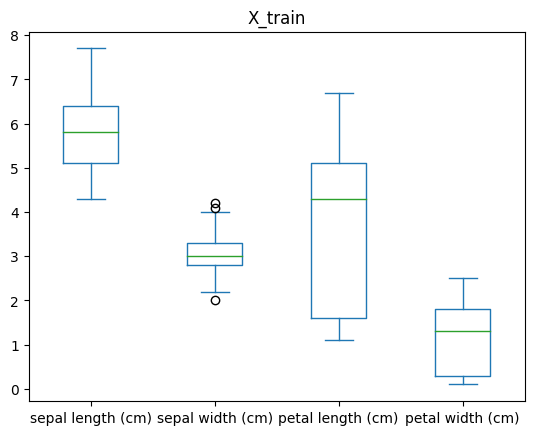

-------------------------------------------------------------------------------


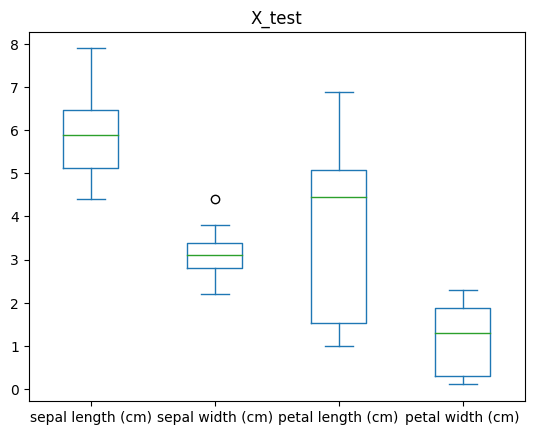

In [6]:
import matplotlib.pyplot as plt
X_train.plot(kind="box")
plt.title("X_train")
plt.show()
print('-------------------------------------------------------------------------------')
X_test.plot(kind="box")
plt.title("X_test")
plt.show()
# 가운데 초록색은 중앙값, 위의 사각형 경계선 : q3 (제 3 사분위수), 아래 사각형 경계선 : q1(제 1사분위수) 
# iqr= q3+q1 ,위쪽 짝대기 = q3 +(iqr * 1.5)  , 아래쪽 : q1 - (iqr * 1.5)  
# 짝대기 바깥: 이상치

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()  # 0과 1사이의 값들로 스케일링
X_train_scaled = mms.fit_transform(X_train) 
X_test_scaled = mms.fit_transform(X_test)
print("X_train_scaled : \n", X_train_scaled)
print("X_test_scaled : \n", X_test_scaled)

X_train_scaled : 
 [[0.20588235 0.72727273 0.05357143 0.04166667]
 [0.26470588 0.95454545 0.07142857 0.        ]
 [0.44117647 0.31818182 0.71428571 0.75      ]
 [0.5        0.63636364 0.60714286 0.625     ]
 [0.70588235 0.5        0.64285714 0.58333333]
 [0.32352941 0.86363636 0.03571429 0.125     ]
 [0.32352941 0.77272727 0.07142857 0.04166667]
 [0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]
 [0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]
 [0.44117647 0.31818182 0.53571429 0.375     ]
 [0.26470588 0.63636364 0.05357143 0.04166667]
 [0.20588235 0.68181818 0.03571429 0.08333333]
 [0.23529412 0.81818182 0.14285714 0.125 

### KNeighbors Classifier 파라메터
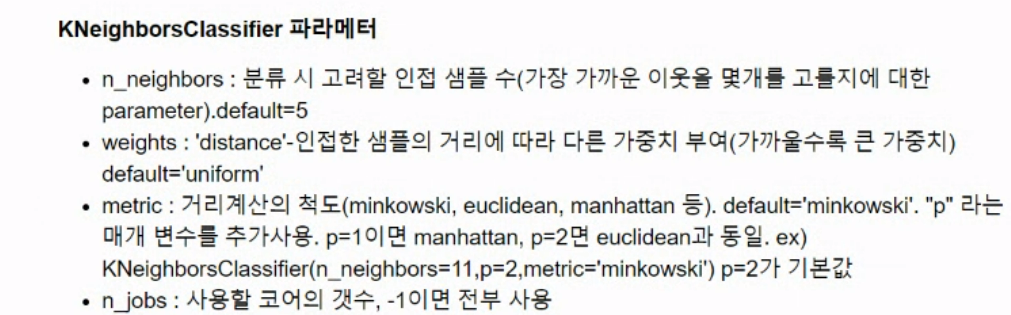

 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [9]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test_scaled)
accuracy_score(y_test, pred)

1.0

### GridSearchCV를 이용해서 최적의 파라메타를 찾아보자.
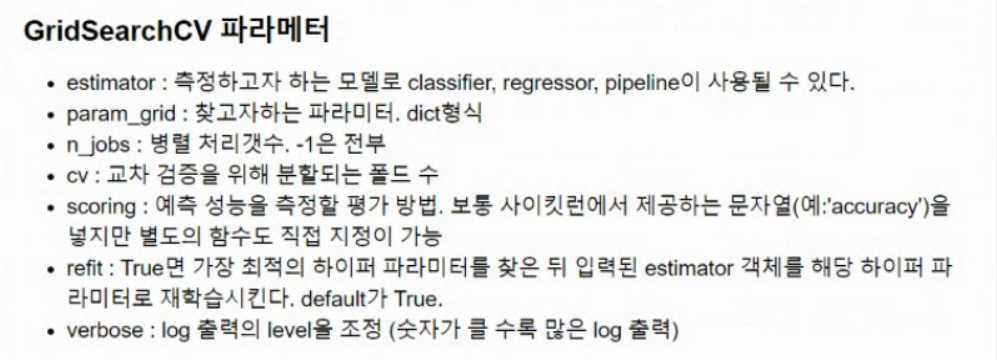

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [11]:
# params = { 
#     'max_depth': [2,3],
#     'min_samples_split': [2,3]
# }
# dtc = DecisionTreeClassifier()
# grid_tree = GridSearchCV(dtc, param_grid = params, cv = 3, refit = True)
# grid_tree.fit(X_train, y_train)

# print('best parameters:', grid_tree.best_params_)
# print('best score:', grid_tree.best_score_)
# em = grid_tree.best_estimator_
# pred = em.predict(X_test)
# accuracy_score(y_test, pred)

In [12]:
# 선생님이 한 것
from sklearn.model_selection import KFold

knn_model = KNeighborsClassifier()
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)
parameters = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15],
             'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric': ['minkowski']}
model = GridSearchCV(estimator = knn_model,
                    param_grid = parameters,
                     cv = cv, verbose = -1,
                     n_jobs = -1, refit = True)
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=-1)

In [13]:
print('Best Estimator:\n', model.best_estimator_)
print('Best Params:\n', model.best_params_)
print('Best Score:\n', model.best_score_)

Best Estimator:
 KNeighborsClassifier(n_neighbors=4)
Best Params:
 {'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Best Score:
 0.9549407114624507


## 농구선수 포지션 예측 실습

In [14]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 그래프 출력을 위해 선언합니다.
%matplotlib inline
# sklearn 모델의 동일핚 결과 출력을 위해 선언합니다.
np.random.seed(5)

In [15]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")


In [16]:
print(train)
print('--------------------------------------------')
print(test)

                 Player Pos   3P  TRB  BLK
0      Denzel Valentine  SG  1.3  2.6  0.1
1           Kyle Korver  SG  2.4  2.8  0.3
2          Troy Daniels  SG  2.1  1.5  0.1
3          Tim Hardaway  SG  1.9  2.8  0.2
4        Dewayne Dedmon   C  0.0  6.5  0.8
..                  ...  ..  ...  ...  ...
75       Victor Oladipo  SG  1.9  4.3  0.3
76  Willie Cauley-Stein   C  0.0  4.5  0.6
77          Brook Lopez   C  1.8  5.4  1.7
78      Josh Richardson  SG  1.4  3.2  0.7
79         Lou Williams  SG  2.0  2.5  0.2

[80 rows x 5 columns]
--------------------------------------------
                  Player Pos   3P   TRB  BLK
0           JaVale McGee   C  0.0   3.2  0.9
1          Manu Ginobili  SG  1.3   2.3  0.2
2           Nene Hilario   C  0.0   4.2  0.6
3          Evan Fournier  SG  1.9   3.1  0.1
4   Georgios Papagiannis   C  0.0   3.9  0.8
5          Anthony Davis   C  0.5  11.8  2.2
6            Tarik Black   C  0.0   5.1  0.7
7         Jamal Crawford  SG  1.4   1.6  0.2
8        Jo

### 최적의 k 찾기 (교차 검증 - cross validation)

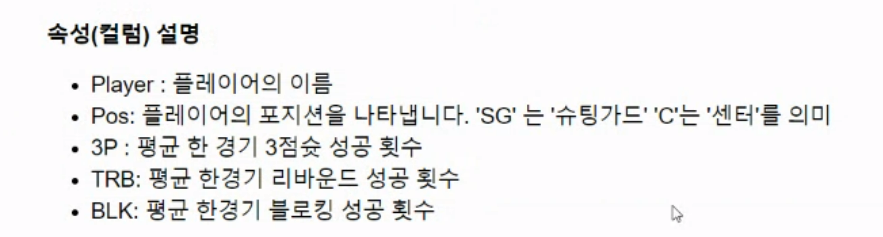

In [17]:
# import kNN library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [18]:
train 

,Player,Pos,3P,TRB,BLK
0,Denzel Valentine,SG,1.3,2.6,0.1
1,Kyle Korver,SG,2.4,2.8,0.3
2,Troy Daniels,SG,2.1,1.5,0.1
3,Tim Hardaway,SG,1.9,2.8,0.2
4,Dewayne Dedmon,C,0.0,6.5,0.8
...,...,...,...,...,...
75,Victor Oladipo,SG,1.9,4.3,0.3
76,Willie Cauley-Stein,C,0.0,4.5,0.6
77,Brook Lopez,C,1.8,5.4,1.7
78,Josh Richardson,SG,1.4,3.2,0.7


In [19]:
# find best k, range from 3 to half of the number of data

max_k_range = train.shape[0] // 2 # 정수형 나눗셈
k_list = []

# k 값에 대한 후보군을 작성하는 내용
for i in range(3, max_k_range, 2):
 k_list.append(i)
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [20]:
max_k_range 
# 위에서 2로 나눴으므로

40

In [21]:
cross_validation_scores = []
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']] # 리스트로 만들어졌으므로 데이터 프레임으로 저장됨


In [22]:
# 10-fold cross validation
for k in k_list:
 knn = KNeighborsClassifier(n_neighbors=k)
 scores = cross_val_score(knn, x_train, y_train.values.ravel(), # ravel() => 1차원 배열로 변환
 cv=10, scoring='accuracy') # cv=10 => 한 블록 당 10개씩 들어감 // scoring='accuracy' => 분류작업이라서 이거 사용
 cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

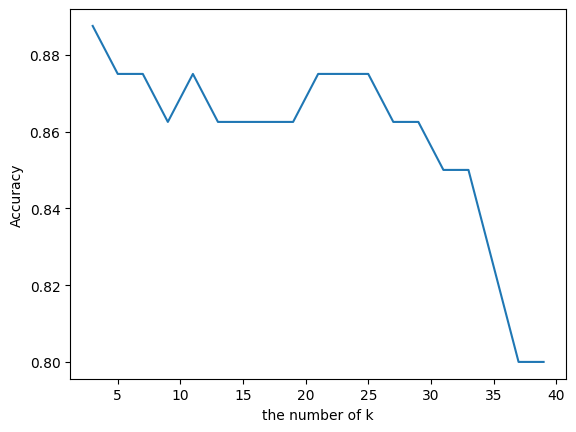

In [23]:
# visualize accuracy according to k (그래프를 그려보자)

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# find best k

cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))] # index => 해당값의 위치 , k리스트에서 가장 큰 값의 위치를 구하고 , 그 위치에 해당하는 k값을 출력
print("The best number of k : " + str(k) ) 


The best number of k : 3


### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [25]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=k)

In [26]:
# select data features
x_train = train[['3P', 'BLK']]
# select target value
y_train = train[['Pos']]

In [27]:
# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [28]:
# select data feature to be used for prediction
x_test = test[['3P', 'BLK']]


In [29]:
# select target value
y_test = test[['Pos']]


In [30]:
# test
pred = knn.predict
(x_test)
pred

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(n_neighbors=3)>

In [31]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,<bound method KNeighborsClassifier.predict of ...,C
1,<bound method KNeighborsClassifier.predict of ...,SG
2,<bound method KNeighborsClassifier.predict of ...,C
3,<bound method KNeighborsClassifier.predict of ...,SG
4,<bound method KNeighborsClassifier.predict of ...,C
5,<bound method KNeighborsClassifier.predict of ...,C
6,<bound method KNeighborsClassifier.predict of ...,C
7,<bound method KNeighborsClassifier.predict of ...,SG
8,<bound method KNeighborsClassifier.predict of ...,SG
9,<bound method KNeighborsClassifier.predict of ...,C


In [32]:
# # check accuracy
# print("accuracy :"+ str(accuracy_score(y_test, pred)))

## 타이타닉 데이터로 위와 같이 해보기
- PassengerId, Name, Ticket, Fare, Cabin 컬럼은 삭제
- Age는 평균, Embarked 는 최빈값
- Sex는 레이블 인코딩, Embarked는 원핫인코딩
- 스케일링은 MinMaxScaler

In [76]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [78]:
import pandas as pd
or_df = pd.read_csv('./titanic/train.csv')
or_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
ndf= or_df.drop(['PassengerId','Name', 'Ticket', 'Fare','Cabin'], axis=1)
ndf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [81]:
ndf['Embarked'].fillna(ndf['Embarked'].value_counts().idxmax, inplace=True) # 다른 결측값 채우기

In [82]:
ndf['Age'].fillna(ndf['Age'].mean(), inplace=True)

In [83]:
ndf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [54]:
# imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# df_age = imp_mean.fit_transform(ndf[['Age']])
# df_age

In [55]:
# imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# df_embarked = imp_mean.fit_transform(ndf[['Embarked']])
# df_embarked

In [62]:
# ndf['Age'] = df_age

In [84]:
df_sex = ndf['Sex']

In [85]:
le = LabelEncoder()

In [86]:
le.fit(df_sex) 
sex = le.transform(df_sex)

In [103]:
ndf['Sex'] = sex
ndf

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,S
1,1,1,0,38.000000,1,0,C
2,1,3,0,26.000000,0,0,S
3,1,1,0,35.000000,1,0,S
4,0,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S
887,1,1,0,19.000000,0,0,S
888,0,3,0,29.699118,1,2,S
889,1,1,1,26.000000,0,0,C


In [109]:
Em_df = pd.get_dummies(or_df,columns = ['Embarked'])
Emp_df = Em_df.iloc[:,11:14]
Emp_df

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [110]:
ndf_p = ndf.iloc[:,:6]
ndf_p

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [111]:
ndf_new = pd.concat([ndf_p, Emp_df], axis = 1)
ndf_new # 원핫인코딩까지 끝

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,0,0,1
1,1,1,0,38.000000,1,0,1,0,0
2,1,3,0,26.000000,0,0,0,0,1
3,1,1,0,35.000000,1,0,0,0,1
4,0,3,1,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,0,0,1
887,1,1,0,19.000000,0,0,0,0,1
888,0,3,0,29.699118,1,2,0,0,1
889,1,1,1,26.000000,0,0,1,0,0


 ### 교수님이 하신 방법 (원핫 인코딩부터)

In [48]:
df = pd.get_dummies(df,columns = ['Embarked'])
df

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], random_state = 42)

In [50]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Saalfeld, Mr. Adolphe'

In [ ]:
from sklearn.model_selection import KFold

knn_model = KNeighborsClassifier()
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)
parameters = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15],
             'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric': ['minkowski']}
model = GridSearchCV(estimator = knn_model,
                    param_grid = parameters,
                     cv = cv, verbose = -1,
                     n_jobs = -1, refit = True)
model.fit(X_train_scaled, y_train)

In [53]:
print('Best Eastimator:\n', model_best_estimator_): 
print('Best Params:\n', model.best_params_): 
print('Best Score:\n', model.best_score_):

SyntaxError: invalid syntax (1492280550.py, line 1)